In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

# Download datasets from KaggleHub
neerajvantagudi_indian_stock_market_data_2015_2024_path = kagglehub.dataset_download('neerajvantagudi/indian-stock-market-data-2015-2024')
tharunreddy2911_mutual_fund_data_path = kagglehub.dataset_download('tharunreddy2911/mutual-fund-data')

print('Data source import complete.')

# Print available files from both datasets
print("\nAvailable files in Indian stock market dataset:")
for dirname, _, filenames in os.walk(neerajvantagudi_indian_stock_market_data_2015_2024_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print("\nAvailable files in Mutual fund dataset:")
for dirname, _, filenames in os.walk(tharunreddy2911_mutual_fund_data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data source import complete.

Available files in Indian stock market dataset:
C:\Users\DELL\.cache\kagglehub\datasets\neerajvantagudi\indian-stock-market-data-2015-2024\versions\1\Dividends.csv
C:\Users\DELL\.cache\kagglehub\datasets\neerajvantagudi\indian-stock-market-data-2015-2024\versions\1\Stock_Data.csv
C:\Users\DELL\.cache\kagglehub\datasets\neerajvantagudi\indian-stock-market-data-2015-2024\versions\1\Stock_Names.csv

Available files in Mutual fund dataset:
C:\Users\DELL\.cache\kagglehub\datasets\tharunreddy2911\mutual-fund-data\versions\145\mutual_fund_data.csv


In [3]:
import pandas as pd
import os
import kagglehub

# Download dataset (if not already)
dataset_path = kagglehub.dataset_download('neerajvantagudi/indian-stock-market-data-2015-2024')

# Verify the path
print("Dataset path:", dataset_path)
print("\nAvailable files:")
for file in os.listdir(dataset_path):
    print(file)

# Load CSV files from the downloaded path
stock_data = pd.read_csv(os.path.join(dataset_path, 'Stock_Data.csv'))
stock_names = pd.read_csv(os.path.join(dataset_path, 'Stock_Names.csv'))
dividends = pd.read_csv(os.path.join(dataset_path, 'Dividends.csv'))

print("=" * 50)
print("STOCK DATA")
print("=" * 50)
print(f"Shape: {stock_data.shape}")
print(f"\nColumns: {stock_data.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(stock_data.head())
print(f"\nData types:")
print(stock_data.dtypes)
print(f"\nMissing values:")
print(stock_data.isnull().sum())

print("\n" + "=" * 50)
print("STOCK NAMES")
print("=" * 50)
print(f"Shape: {stock_names.shape}")
print(f"\nColumns: {stock_names.columns.tolist()}")
print(f"\nFirst 10 rows:")
print(stock_names.head(10))

print("\n" + "=" * 50)
print("DIVIDENDS")
print("=" * 50)
print(f"Shape: {dividends.shape}")
print(f"\nColumns: {dividends.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(dividends.head())

print("\n" + "=" * 50)
print("DATE RANGE")
print("=" * 50)
print(f"Earliest date: {stock_data['Date'].min()}")
print(f"Latest date: {stock_data['Date'].max()}")

print("\n" + "=" * 50)
print("UNIQUE STOCKS")
print("=" * 50)
print(f"Total unique stocks: {stock_data['Stock'].nunique()}")
print(f"\nAll stock symbols:")
print(stock_data['Stock'].unique())
print(f"\nData points per stock (sample):")
print(stock_data['Stock'].value_counts().head(10))


Dataset path: C:\Users\DELL\.cache\kagglehub\datasets\neerajvantagudi\indian-stock-market-data-2015-2024\versions\1

Available files:
Dividends.csv
Stock_Data.csv
Stock_Names.csv
STOCK DATA
Shape: (453672, 7)

Columns: ['Unnamed: 0', 'Date', 'Stock', 'Index_name', 'Close', 'Volume', 'Daily_Return_%']

First 5 rows:
   Unnamed: 0        Date       Stock Index_name    Close   Volume  \
0           0  2015-01-01  ADANIPORTS   NIFTY 50   303.24  1456204   
1           1  2015-01-01  APOLLOHOSP   NIFTY 50  1083.59    76848   
2           2  2015-01-01  ASIANPAINT   NIFTY 50   695.76   284935   
3           3  2015-01-01    AXISBANK   NIFTY 50   486.87  1351985   
4           4  2015-01-01  BAJFINANCE   NIFTY 50   339.66    75660   

   Daily_Return_%  
0            0.17  
1           -0.45  
2           -0.26  
3            0.08  
4            0.45  

Data types:
Unnamed: 0          int64
Date               object
Stock              object
Index_name         object
Close             float64

In [4]:
!pip install ta


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
from ta import momentum, trend, volatility
import kagglehub
import os

# Download dataset (if not already)
print("Downloading or locating dataset...")
dataset_path = kagglehub.dataset_download('neerajvantagudi/indian-stock-market-data-2015-2024')

print("Dataset path:", dataset_path)
print("\nFiles in dataset:")
for file in os.listdir(dataset_path):
    print(" -", file)

# Load data correctly from local KaggleHub path
print("\nLoading data...")
stock_data = pd.read_csv(os.path.join(dataset_path, 'Stock_Data.csv'))

# Convert Date to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sort by Stock and Date
stock_data = stock_data.sort_values(['Stock', 'Date'])

print("Calculating technical indicators...")

# Define a helper function to calculate indicators per stock
def calculate_indicators(df):
    """Calculate technical indicators for a single stock"""
    df = df.copy()

    # RSI (Relative Strength Index)
    df['RSI'] = momentum.rsi(df['Close'], window=14)

    # MACD (Moving Average Convergence Divergence)
    df['MACD'] = trend.macd_diff(df['Close'])

    # Bollinger Bands
    bb_high = volatility.bollinger_hband(df['Close'])
    bb_low = volatility.bollinger_lband(df['Close'])
    df['BB_width'] = bb_high - bb_low

    # Moving Averages
    df['SMA_20'] = trend.sma_indicator(df['Close'], window=20)
    df['SMA_50'] = trend.sma_indicator(df['Close'], window=50)

    # Daily returns in percentage
    df['Daily_Return_%'] = df['Close'].pct_change() * 100

    # Volatility (rolling std dev of returns)
    df['Volatility_30'] = df['Daily_Return_%'].rolling(window=30).std()
    df['Volatility_90'] = df['Daily_Return_%'].rolling(window=90).std()

    # Momentum (rate of change)
    df['Momentum'] = df['Close'].pct_change(periods=10) * 100

    return df

# Apply function to each stock
print("Processing all stocks...")
stock_data = stock_data.groupby('Stock', group_keys=False).apply(calculate_indicators)

# Drop initial NaN values caused by indicator calculations
print(f"Rows before cleaning: {len(stock_data)}")
stock_data = stock_data.dropna()
print(f"Rows after cleaning: {len(stock_data)}")

# Show sample output
print("\n" + "=" * 50)
print("SAMPLE DATA WITH INDICATORS")
print("=" * 50)
print(stock_data[['Date', 'Stock', 'Close', 'RSI', 'MACD', 'Volatility_30', 'Volatility_90']].head(10))

print("\n" + "=" * 50)
print("DATA SUMMARY")
print("=" * 50)
print(stock_data.describe())

print("\nTechnical indicators calculated successfully!")


Dataset path: C:\Users\DELL\.cache\kagglehub\datasets\neerajvantagudi\indian-stock-market-data-2015-2024\versions\1

Files in dataset:
 - Dividends.csv
 - Stock_Data.csv
 - Stock_Names.csv

Loading data...
Calculating technical indicators...
Processing all stocks...
Rows before cleaning: 453672
Rows after cleaning: 442152

SAMPLE DATA WITH INDICATORS
            Date     Stock   Close        RSI      MACD  Volatility_30  \
15654 2015-05-18  ADANIENT  111.61  67.968916  1.174986       2.937627   
15827 2015-05-19  ADANIENT  110.99  66.815721  1.269484       2.938731   
16000 2015-05-20  ADANIENT  112.49  68.220548  1.332846       2.918864   
16173 2015-05-21  ADANIENT  112.49  68.220548  1.274605       2.913826   
16346 2015-05-22  ADANIENT  114.55  70.227996  1.271759       2.921056   
16519 2015-05-25  ADANIENT  113.34  67.529665  1.092200       2.926918   
16692 2015-05-26  ADANIENT  114.37  68.634442  0.951755       2.920522   
16865 2015-05-27  ADANIENT  113.94  67.600365  0.747847

In [6]:
import pandas as pd
import numpy as np

# Assuming stock_data is already loaded with indicators from previous step
# If not, you'll need to run the previous code first

print("Creating risk labels based on volatility...")

# Define risk categories based on 30-day volatility
def classify_risk(volatility):
    """
    Classify stock risk based on volatility
    Low risk: volatility < 1.5%
    Medium risk: 1.5% <= volatility < 3.0%
    High risk: volatility >= 3.0%
    """
    if volatility < 1.5:
        return 0  # Low risk
    elif volatility < 3.0:
        return 1  # Medium risk
    else:
        return 2  # High risk

# Apply classification
stock_data['Risk_Label'] = stock_data['Volatility_30'].apply(classify_risk)

print("\n" + "=" * 50)
print("RISK DISTRIBUTION")
print("=" * 50)
print(stock_data['Risk_Label'].value_counts().sort_index())
print("\nPercentage distribution:")
print(stock_data['Risk_Label'].value_counts(normalize=True).sort_index() * 100)

# Select features for training
features = [
    'RSI',
    'MACD',
    'Volatility_30',
    'Volatility_90',
    'BB_width',
    'Momentum',
    'Daily_Return_%'
]

print("\n" + "=" * 50)
print("FEATURES FOR TRAINING")
print("=" * 50)
print(features)

# Prepare X (features) and y (labels)
X = stock_data[features].copy()
y = stock_data['Risk_Label'].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Check for any remaining NaN values
print(f"\nNaN values in features:")
print(X.isnull().sum())

# Remove any remaining NaN rows
mask = ~(X.isnull().any(axis=1))
X = X[mask]
y = y[mask]

print(f"\nFinal training data shape: {X.shape}")
print(f"Final labels shape: {y.shape}")

print("\n Data prepared for training!")

Creating risk labels based on volatility...

RISK DISTRIBUTION
Risk_Label
0    243822
1    158718
2     39612
Name: count, dtype: int64

Percentage distribution:
Risk_Label
0    55.144385
1    35.896705
2     8.958910
Name: proportion, dtype: float64

FEATURES FOR TRAINING
['RSI', 'MACD', 'Volatility_30', 'Volatility_90', 'BB_width', 'Momentum', 'Daily_Return_%']

Feature matrix shape: (442152, 7)
Labels shape: (442152,)

NaN values in features:
RSI               0
MACD              0
Volatility_30     0
Volatility_90     0
BB_width          0
Momentum          0
Daily_Return_%    0
dtype: int64

Final training data shape: (442152, 7)
Final labels shape: (442152,)

 Data prepared for training!


In [7]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

print("Splitting data into train and test sets...")
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

print("\n" + "=" * 50)
print("TRAINING XGBOOST MODEL")
print("=" * 50)

# Create XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='mlogloss'
)

# Train the model
print("Training started...")
model.fit(X_train, y_train)
print("✅ Training completed!")

print("\n" + "=" * 50)
print("MODEL EVALUATION")
print("=" * 50)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\n" + "=" * 50)

print("\n" + "=" * 50)
print("CONFUSION MATRIX (Test Set)")
print("=" * 50)
cm = confusion_matrix(y_test, y_pred_test)
print("Actual \\ Predicted  |  Low  |  Med  | High")
print("-" * 50)
print(f"Low Risk           | {cm[0][0]:5d} | {cm[0][1]:5d} | {cm[0][2]:5d}")
print(f"Medium Risk        | {cm[1][0]:5d} | {cm[1][1]:5d} | {cm[1][2]:5d}")
print(f"High Risk          | {cm[2][0]:5d} | {cm[2][1]:5d} | {cm[2][2]:5d}")

print("\n" + "=" * 50)
print("FEATURE IMPORTANCE")
print("=" * 50)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

print("\nModel training and evaluation completed!")

Splitting data into train and test sets...
Training set size: 353721
Test set size: 88431

TRAINING XGBOOST MODEL
Training started...
✅ Training completed!

MODEL EVALUATION
Training Accuracy: 99.94%
Test Accuracy: 99.92%


CONFUSION MATRIX (Test Set)
Actual \ Predicted  |  Low  |  Med  | High
--------------------------------------------------
Low Risk           | 48727 |    38 |     0
Medium Risk        |     3 | 31713 |    28
High Risk          |     0 |     0 |  7922

FEATURE IMPORTANCE
          Feature  Importance
2   Volatility_30    0.998259
0             RSI    0.000350
5        Momentum    0.000321
4        BB_width    0.000303
1            MACD    0.000273
3   Volatility_90    0.000252
6  Daily_Return_%    0.000240

Model training and evaluation completed!


GENERATING PERFORMANCE VISUALIZATIONS

📊 Creating Confusion Matrix Heatmap...


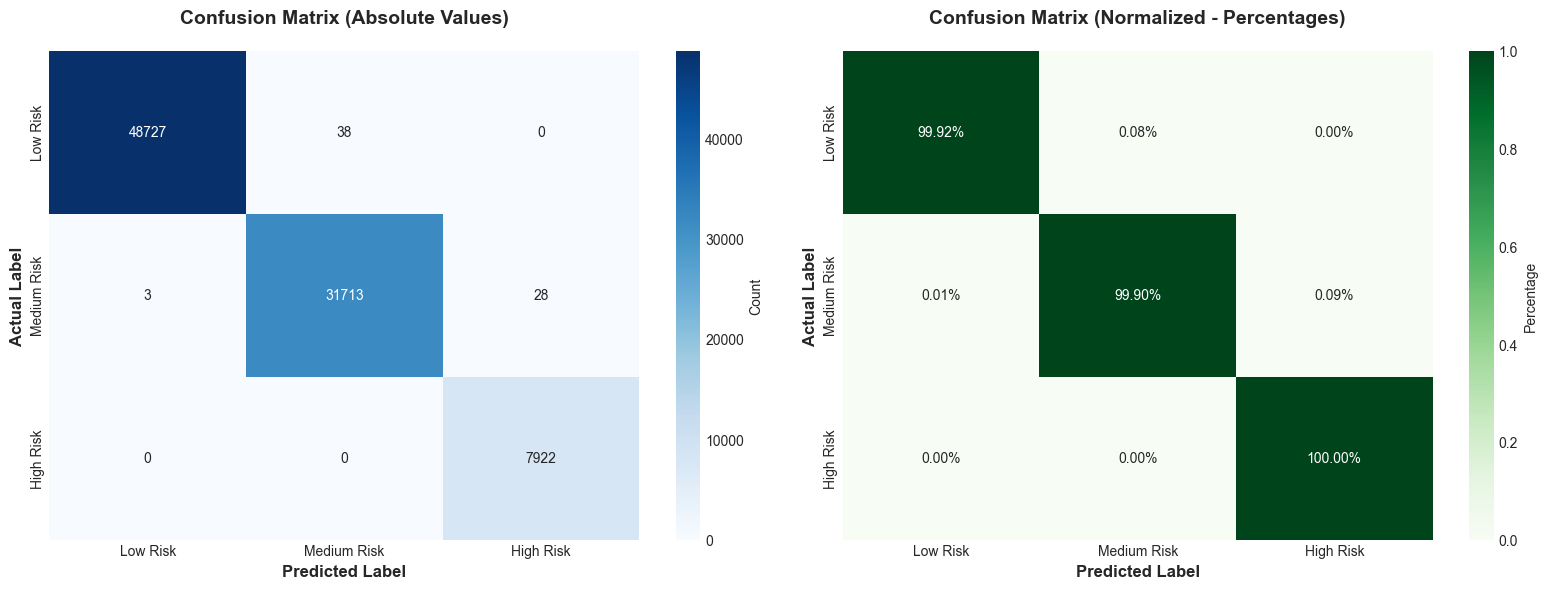


📊 Creating Feature Correlation Heatmap...


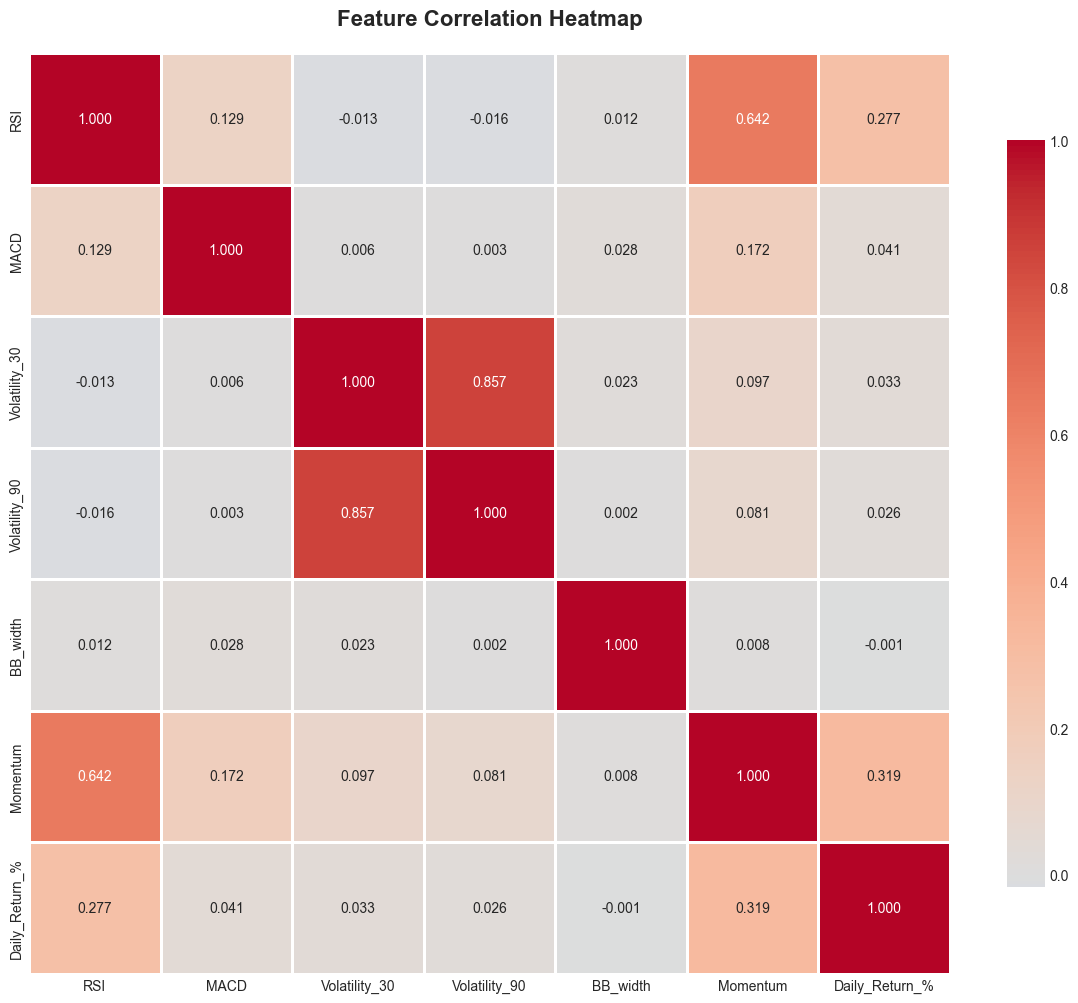


📊 Creating Performance Metrics Table...

PERFORMANCE METRICS TABLE
                 Class Precision Recall F1-Score  Support Class Accuracy
              Low Risk    0.9999 0.9992   0.9996    48765         0.9992
           Medium Risk    0.9988 0.9990   0.9989    31744         0.9990
             High Risk    0.9965 1.0000   0.9982     7922         1.0000
OVERALL (Weighted Avg)    0.9992 0.9992   0.9992    88431         0.9992


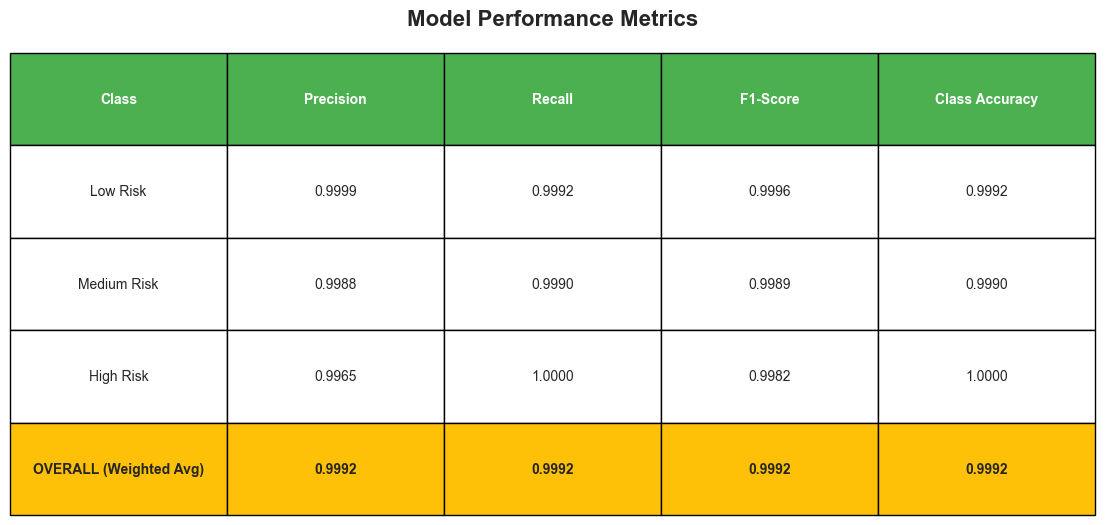


📊 Creating Feature Importance Visualization...


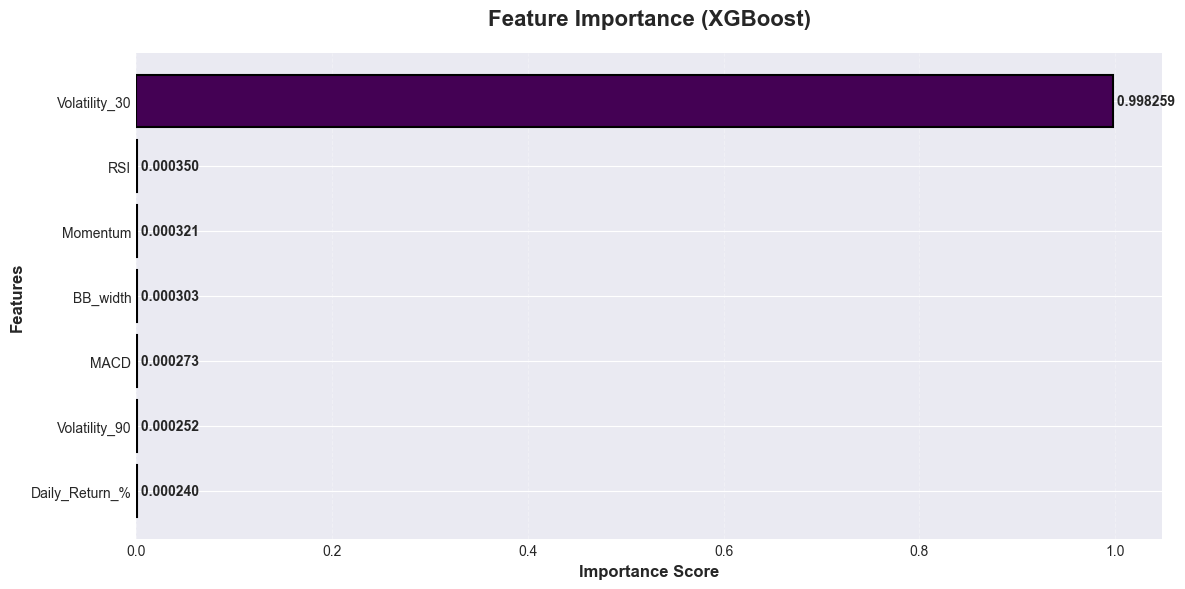

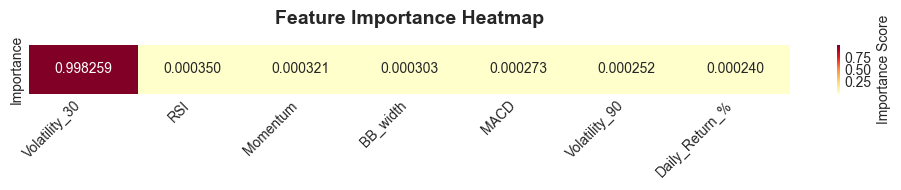


SUMMARY STATISTICS
Total Test Samples: 88431
Overall Accuracy: 0.9992 (99.92%)
Macro Average Precision: 0.9984
Macro Average Recall: 0.9994
Macro Average F1-Score: 0.9989
Weighted Average Precision: 0.9992
Weighted Average Recall: 0.9992
Weighted Average F1-Score: 0.9992

✅ All visualizations generated successfully!


In [20]:
# ============================================================
# PERFORMANCE VISUALIZATIONS (First Model)
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import pandas as pd
import numpy as np

# Set style for better-looking plots
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")

print("=" * 60)
print("GENERATING PERFORMANCE VISUALIZATIONS")
print("=" * 60)

# ============================================================
# 1. CONFUSION MATRIX HEATMAP
# ============================================================
print("\n📊 Creating Confusion Matrix Heatmap...")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Create labels
class_labels = ['Low Risk', 'Medium Risk', 'High Risk']

# Normalize confusion matrix for percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute values confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels,
            cbar_kws={'label': 'Count'}, ax=axes[0])
axes[0].set_title('Confusion Matrix (Absolute Values)', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Actual Label', fontsize=12, fontweight='bold')

# Plot 2: Normalized confusion matrix (percentages)
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens',
            xticklabels=class_labels, yticklabels=class_labels,
            cbar_kws={'label': 'Percentage'}, ax=axes[1])
axes[1].set_title('Confusion Matrix (Normalized - Percentages)', fontsize=14, fontweight='bold', pad=20)
axes[1].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Actual Label', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================
# 2. FEATURE CORRELATION HEATMAP
# ============================================================
print("\n📊 Creating Feature Correlation Heatmap...")

# Calculate correlation matrix
correlation_matrix = X_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
           center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# ============================================================
# 3. PERFORMANCE METRICS TABLE
# ============================================================
print("\n📊 Creating Performance Metrics Table...")

# Calculate detailed metrics
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_pred_test, labels=[0, 1, 2], zero_division=0
)

# Calculate accuracy per class
class_accuracy = []
for i in range(3):
    class_acc = cm[i, i] / cm[i, :].sum() if cm[i, :].sum() > 0 else 0
    class_accuracy.append(class_acc)

# Create performance table
performance_data = {
    'Class': ['Low Risk', 'Medium Risk', 'High Risk'],
    'Precision': [f'{p:.4f}' for p in precision],
    'Recall': [f'{r:.4f}' for r in recall],
    'F1-Score': [f'{f:.4f}' for f in f1],
    'Support': support.tolist(),
    'Class Accuracy': [f'{acc:.4f}' for acc in class_accuracy]
}

performance_df = pd.DataFrame(performance_data)

# Calculate overall metrics
overall_accuracy = (cm[0, 0] + cm[1, 1] + cm[2, 2]) / cm.sum()
macro_precision = precision.mean()
macro_recall = recall.mean()
macro_f1 = f1.mean()
weighted_precision = np.average(precision, weights=support)
weighted_recall = np.average(recall, weights=support)
weighted_f1 = np.average(f1, weights=support)

# Add overall metrics row
overall_row = pd.DataFrame({
    'Class': ['OVERALL (Weighted Avg)'],
    'Precision': [f'{weighted_precision:.4f}'],
    'Recall': [f'{weighted_recall:.4f}'],
    'F1-Score': [f'{weighted_f1:.4f}'],
    'Support': [support.sum()],
    'Class Accuracy': [f'{overall_accuracy:.4f}']
})

performance_df = pd.concat([performance_df, overall_row], ignore_index=True)

# Display as styled table
print("\n" + "=" * 80)
print("PERFORMANCE METRICS TABLE")
print("=" * 80)
print(performance_df.to_string(index=False))
print("=" * 80)

# Create visual table
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')

# Prepare data for table
table_data = performance_df[['Class', 'Precision', 'Recall', 'F1-Score', 'Class Accuracy']].values

table = ax.table(cellText=table_data,
                colLabels=['Class', 'Precision', 'Recall', 'F1-Score', 'Class Accuracy'],
                cellLoc='center',
                loc='center',
                bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style the header
for i in range(5):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Style the overall row
for i in range(5):
    table[(4, i)].set_facecolor('#FFC107')
    table[(4, i)].set_text_props(weight='bold')

plt.title('Model Performance Metrics', fontsize=16, fontweight='bold', pad=20)
plt.show()

# ============================================================
# 4. FEATURE IMPORTANCE VISUALIZATION
# ============================================================
print("\n📊 Creating Feature Importance Visualization...")

# Get feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance_df)))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], 
               color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (idx, row) in enumerate(feature_importance_df.iterrows()):
    plt.text(row['Importance'], i, f' {row["Importance"]:.6f}', 
            va='center', fontweight='bold', fontsize=10)

plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance (XGBoost)', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Create heatmap-style visualization
plt.figure(figsize=(10, 2))
importance_matrix = feature_importance_df['Importance'].values.reshape(1, -1)
sns.heatmap(importance_matrix, 
           xticklabels=feature_importance_df['Feature'],
           yticklabels=['Importance'],
           annot=True, fmt='.6f', cmap='YlOrRd', 
           cbar_kws={'label': 'Importance Score'})
plt.title('Feature Importance Heatmap', fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ============================================================
# 5. SUMMARY STATISTICS
# ============================================================
print("\n" + "=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)
print(f"Total Test Samples: {len(y_test)}")
print(f"Overall Accuracy: {overall_accuracy:.4f} ({overall_accuracy*100:.2f}%)")
print(f"Macro Average Precision: {macro_precision:.4f}")
print(f"Macro Average Recall: {macro_recall:.4f}")
print(f"Macro Average F1-Score: {macro_f1:.4f}")
print(f"Weighted Average Precision: {weighted_precision:.4f}")
print(f"Weighted Average Recall: {weighted_recall:.4f}")
print(f"Weighted Average F1-Score: {weighted_f1:.4f}")
print("=" * 80)

print("\n✅ All visualizations generated successfully!")



In [21]:
import joblib

print("Saving trained model...")

# Save the model
joblib.dump(model, 'stock_risk_model.pkl')

print("Model saved as: stock_risk_model.pkl")

# Save feature names for later use
joblib.dump(features, 'model_features.pkl')

print("Feature names saved as: model_features.pkl")

# Test loading the model
loaded_model = joblib.load('stock_risk_model.pkl')
loaded_features = joblib.load('model_features.pkl')

print("\nVerifying saved model...")
test_prediction = loaded_model.predict(X_test[:5])
print(f"Test predictions: {test_prediction}")
print(f"Actual labels: {y_test[:5].values}")



Saving trained model...
Model saved as: stock_risk_model.pkl
Feature names saved as: model_features.pkl

Verifying saved model...
Test predictions: [0 0 0 1 0]
Actual labels: [0 0 0 1 0]


In [23]:

def predict_stock_risk(rsi, macd, vol_30, vol_90, bb_width, momentum, daily_return):
    """
    Predict stock risk level
    Returns: 0 (Low), 1 (Medium), 2 (High)
    """
    input_data = [[rsi, macd, vol_30, vol_90, bb_width, momentum, daily_return]]
    prediction = loaded_model.predict(input_data)[0]
    risk_labels = ['Low Risk', 'Medium Risk', 'High Risk']
    return risk_labels[prediction]

print("Testing prediction function with sample data...")
print("\n" + "=" * 50)


print("Test 1 - Low Volatility Stock:")
print(f"Inputs: RSI=55, MACD=0.5, Vol_30=1.2, Vol_90=1.3")
result1 = predict_stock_risk(55, 0.5, 1.2, 1.3, 20, 2.5, 0.5)
print(f"Prediction: {result1}")


print("\nTest 2 - High Volatility Stock:")
print(f"Inputs: RSI=45, MACD=-0.5, Vol_30=3.5, Vol_90=3.8")
result2 = predict_stock_risk(45, -0.5, 3.5, 3.8, 50, -1.5, -2.0)
print(f"Prediction: {result2}")

print("\nTest 3 - Medium Volatility Stock:")
print(f"Inputs: RSI=52, MACD=0.2, Vol_30=2.0, Vol_90=2.1")
result3 = predict_stock_risk(52, 0.2, 2.0, 2.1, 30, 1.0, 0.3)
print(f"Prediction: {result3}")



Testing prediction function with sample data...

Test 1 - Low Volatility Stock:
Inputs: RSI=55, MACD=0.5, Vol_30=1.2, Vol_90=1.3
Prediction: Low Risk

Test 2 - High Volatility Stock:
Inputs: RSI=45, MACD=-0.5, Vol_30=3.5, Vol_90=3.8
Prediction: High Risk

Test 3 - Medium Volatility Stock:
Inputs: RSI=52, MACD=0.2, Vol_30=2.0, Vol_90=2.1
Prediction: Medium Risk


In [24]:


# Install required libraries
!pip install ta yfinance

# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
from ta import momentum, trend, volatility
from datetime import datetime, timedelta
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

print("=" * 50)
print("STOCK RISK MODEL TRAINING - 2024-2025 DATA")
print("=" * 50)

# Define stock list (representative sample from different sectors)
# You can use any stocks - model will learn general patterns
training_stocks = [
    'RELIANCE.NS',    # Oil & Gas
    'TCS.NS',         # IT
    'HDFCBANK.NS',    # Banking
    'INFY.NS',        # IT
    'ICICIBANK.NS',   # Banking
    'HINDUNILVR.NS',  # FMCG
    'ITC.NS',         # FMCG
    'SBIN.NS',        # Banking
    'BHARTIARTL.NS',  # Telecom
    'KOTAKBANK.NS',   # Banking
    'LT.NS',          # Infrastructure
    'AXISBANK.NS',    # Banking
    'MARUTI.NS',      # Auto
    'SUNPHARMA.NS',   # Pharma
    'TATAMOTORS.NS',  # Auto
    'TITAN.NS',       # Consumer
    'WIPRO.NS',       # IT
    'ULTRACEMCO.NS',  # Cement
    'ADANIPORTS.NS',  # Infrastructure
    'ASIANPAINT.NS'   # Paint
]

print(f"\n Training on {len(training_stocks)} stocks")
print("Stocks:", [s.replace('.NS', '') for s in training_stocks])

# Fetch data from Jan 2024 to current date
def fetch_stock_data(ticker, start_date='2024-01-01'):
    """Fetch stock data from Yahoo Finance"""
    try:
        end_date = datetime.now()
        stock = yf.Ticker(ticker)
        df = stock.history(start=start_date, end=end_date)

        if df.empty:
            return None

        df['Stock'] = ticker
        df['Date'] = df.index
        df.reset_index(drop=True, inplace=True)

        # Calculate daily returns
        df['Daily_Return_%'] = df['Close'].pct_change() * 100

        return df
    except Exception as e:
        print(f"Error fetching {ticker}: {str(e)}")
        return None

# Fetch all stock data
print("\n⏳ Fetching data from Yahoo Finance...")
all_stock_data = []

for i, stock in enumerate(training_stocks, 1):
    print(f"Fetching {i}/{len(training_stocks)}: {stock}")
    df = fetch_stock_data(stock)
    if df is not None:
        all_stock_data.append(df)

# Combine all data
stock_data = pd.concat(all_stock_data, ignore_index=True)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.sort_values(['Stock', 'Date'])

print(f"\n Data fetched successfully!")
print(f"Total rows: {len(stock_data)}")
print(f"Date range: {stock_data['Date'].min()} to {stock_data['Date'].max()}")
print(f"Stocks: {stock_data['Stock'].nunique()}")

# Calculate technical indicators
print("\n⏳ Calculating technical indicators...")

def calculate_indicators(df):
    """Calculate technical indicators for a single stock"""
    df = df.copy()

    # RSI (Relative Strength Index)
    df['RSI'] = momentum.rsi(df['Close'], window=14)

    # MACD
    df['MACD'] = trend.macd_diff(df['Close'])

    # Bollinger Bands
    bb_high = volatility.bollinger_hband(df['Close'])
    bb_low = volatility.bollinger_lband(df['Close'])
    df['BB_width'] = bb_high - bb_low

    # Moving Averages
    df['SMA_20'] = trend.sma_indicator(df['Close'], window=20)
    df['SMA_50'] = trend.sma_indicator(df['Close'], window=50)

    # Volatility (30-day and 90-day rolling standard deviation)
    df['Volatility_30'] = df['Daily_Return_%'].rolling(window=30).std()
    df['Volatility_90'] = df['Daily_Return_%'].rolling(window=90).std()

    # Price momentum (10-day rate of change)
    df['Momentum'] = df['Close'].pct_change(periods=10) * 100

    return df

# Apply to all stocks
stock_data = stock_data.groupby('Stock', group_keys=False).apply(calculate_indicators)

# Remove NaN rows
print(f"Rows before cleaning: {len(stock_data)}")
stock_data = stock_data.dropna()
print(f"Rows after cleaning: {len(stock_data)}")

print("\n Technical indicators calculated!")

# Calculate percentile-based risk thresholds (adaptive to current market)
print("\n Calculating risk thresholds based on 2024-2025 data...")

vol_30_percentiles = stock_data['Volatility_30'].describe(percentiles=[0.33, 0.67])
low_threshold = vol_30_percentiles['33%']
high_threshold = vol_30_percentiles['67%']

print(f"Low Risk threshold: Volatility < {low_threshold:.4f}")
print(f"Medium Risk threshold: {low_threshold:.4f} <= Volatility < {high_threshold:.4f}")
print(f"High Risk threshold: Volatility >= {high_threshold:.4f}")

# Define risk classification using calculated thresholds
def classify_risk(volatility):
    """Classify stock risk based on volatility percentiles"""
    if volatility < low_threshold:
        return 0  # Low risk
    elif volatility < high_threshold:
        return 1  # Medium risk
    else:
        return 2  # High risk

# Apply classification
stock_data['Risk_Label'] = stock_data['Volatility_30'].apply(classify_risk)

print("\n" + "=" * 50)
print("RISK DISTRIBUTION")
print("=" * 50)
risk_counts = stock_data['Risk_Label'].value_counts().sort_index()
print(f"Low Risk (0): {risk_counts.get(0, 0)} ({risk_counts.get(0, 0)/len(stock_data)*100:.1f}%)")
print(f"Medium Risk (1): {risk_counts.get(1, 0)} ({risk_counts.get(1, 0)/len(stock_data)*100:.1f}%)")
print(f"High Risk (2): {risk_counts.get(2, 0)} ({risk_counts.get(2, 0)/len(stock_data)*100:.1f}%)")

# Prepare features for training
features = [
    'RSI',
    'MACD',
    'Volatility_30',
    'Volatility_90',
    'BB_width',
    'Momentum',
    'Daily_Return_%'
]

print("\n" + "=" * 50)
print("PREPARING TRAINING DATA")
print("=" * 50)
print(f"Features: {features}")

X = stock_data[features].copy()
y = stock_data['Risk_Label'].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Remove any remaining NaN
mask = ~(X.isnull().any(axis=1))
X = X[mask]
y = y[mask]

print(f"Final training data shape: {X.shape}")

# Split data
print("\n⏳ Splitting data: 80% train, 20% test...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Train XGBoost model
print("\n" + "=" * 50)
print("TRAINING XGBOOST MODEL")
print("=" * 50)

model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='mlogloss'
)

print("Training started...")
model.fit(X_train, y_train)
print("Training completed!")

# Evaluate model
print("\n" + "=" * 50)
print("MODEL EVALUATION")
print("=" * 50)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\n" + "=" * 50)
print("CLASSIFICATION REPORT (Test Set)")
print("=" * 50)
print(classification_report(y_test, y_pred_test,
                          target_names=['Low Risk', 'Medium Risk', 'High Risk']))

print("\n" + "=" * 50)
print("CONFUSION MATRIX (Test Set)")
print("=" * 50)
cm = confusion_matrix(y_test, y_pred_test)
print("Actual \\ Predicted  |  Low  |  Med  | High")
print("-" * 50)
for i, label in enumerate(['Low Risk', 'Medium Risk', 'High Risk']):
    print(f"{label:18s} | {cm[i][0]:5d} | {cm[i][1]:5d} | {cm[i][2]:5d}")

print("\n" + "=" * 50)
print("FEATURE IMPORTANCE")
print("=" * 50)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance)

# Save model and metadata
print("\n" + "=" * 50)
print("SAVING MODEL")
print("=" * 50)

joblib.dump(model, 'stock_risk_model.pkl')
print(" Model saved: stock_risk_model.pkl")

joblib.dump(features, 'model_features.pkl')
print(" Features saved: model_features.pkl")

# Save thresholds for reference
thresholds = {
    'low_threshold': low_threshold,
    'high_threshold': high_threshold,
    'training_date_range': {
        'start': str(stock_data['Date'].min()),
        'end': str(stock_data['Date'].max())
    },
    'training_stocks': len(training_stocks)
}
joblib.dump(thresholds, 'model_thresholds.pkl')
print("Thresholds saved: model_thresholds.pkl")

# Test predictions
print("\n" + "=" * 50)
print("TESTING MODEL")
print("=" * 50)

def predict_risk(rsi, macd, vol_30, vol_90, bb_width, momentum, daily_return):
    """Predict stock risk"""
    input_data = [[rsi, macd, vol_30, vol_90, bb_width, momentum, daily_return]]
    prediction = model.predict(input_data)[0]
    probabilities = model.predict_proba(input_data)[0]

    risk_labels = ['Low Risk', 'Medium Risk', 'High Risk']

    return {
        'prediction': risk_labels[prediction],
        'probabilities': {
            'Low': probabilities[0],
            'Medium': probabilities[1],
            'High': probabilities[2]
        }
    }

# Test with sample data
print("\nTest 1 - Low volatility:")
result = predict_risk(55, 0.5, 0.8, 0.9, 20, 2.0, 0.5)
print(f"Prediction: {result['prediction']}")
print(f"Probabilities: {result['probabilities']}")

print("\nTest 2 - High volatility:")
result = predict_risk(45, -0.5, 2.5, 2.8, 50, -2.0, -1.5)
print(f"Prediction: {result['prediction']}")
print(f"Probabilities: {result['probabilities']}")

print("\n" + "=" * 50)
print("MODEL TRAINING COMPLETE!")
print("=" * 50)
print("\nFiles created:")
print("1. stock_risk_model.pkl - Trained model")
print("2. model_features.pkl - Feature names")
print("3. model_thresholds.pkl - Risk thresholds")
print("\nDownload these files and place them in your Streamlit project folder.")


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


STOCK RISK MODEL TRAINING - 2024-2025 DATA

 Training on 20 stocks
Stocks: ['RELIANCE', 'TCS', 'HDFCBANK', 'INFY', 'ICICIBANK', 'HINDUNILVR', 'ITC', 'SBIN', 'BHARTIARTL', 'KOTAKBANK', 'LT', 'AXISBANK', 'MARUTI', 'SUNPHARMA', 'TATAMOTORS', 'TITAN', 'WIPRO', 'ULTRACEMCO', 'ADANIPORTS', 'ASIANPAINT']

⏳ Fetching data from Yahoo Finance...
Fetching 1/20: RELIANCE.NS
Fetching 2/20: TCS.NS
Fetching 3/20: HDFCBANK.NS
Fetching 4/20: INFY.NS
Fetching 5/20: ICICIBANK.NS
Fetching 6/20: HINDUNILVR.NS
Fetching 7/20: ITC.NS
Fetching 8/20: SBIN.NS
Fetching 9/20: BHARTIARTL.NS
Fetching 10/20: KOTAKBANK.NS
Fetching 11/20: LT.NS
Fetching 12/20: AXISBANK.NS
Fetching 13/20: MARUTI.NS
Fetching 14/20: SUNPHARMA.NS
Fetching 15/20: TATAMOTORS.NS
Fetching 16/20: TITAN.NS
Fetching 17/20: WIPRO.NS
Fetching 18/20: ULTRACEMCO.NS
Fetching 19/20: ADANIPORTS.NS
Fetching 20/20: ASIANPAINT.NS

 Data fetched successfully!
Total rows: 9259
Date range: 2024-01-01 00:00:00+05:30 to 2025-11-13 00:00:00+05:30
Stocks: 20

⏳ C

GENERATING PERFORMANCE VISUALIZATIONS

📊 Creating Confusion Matrix Heatmap...


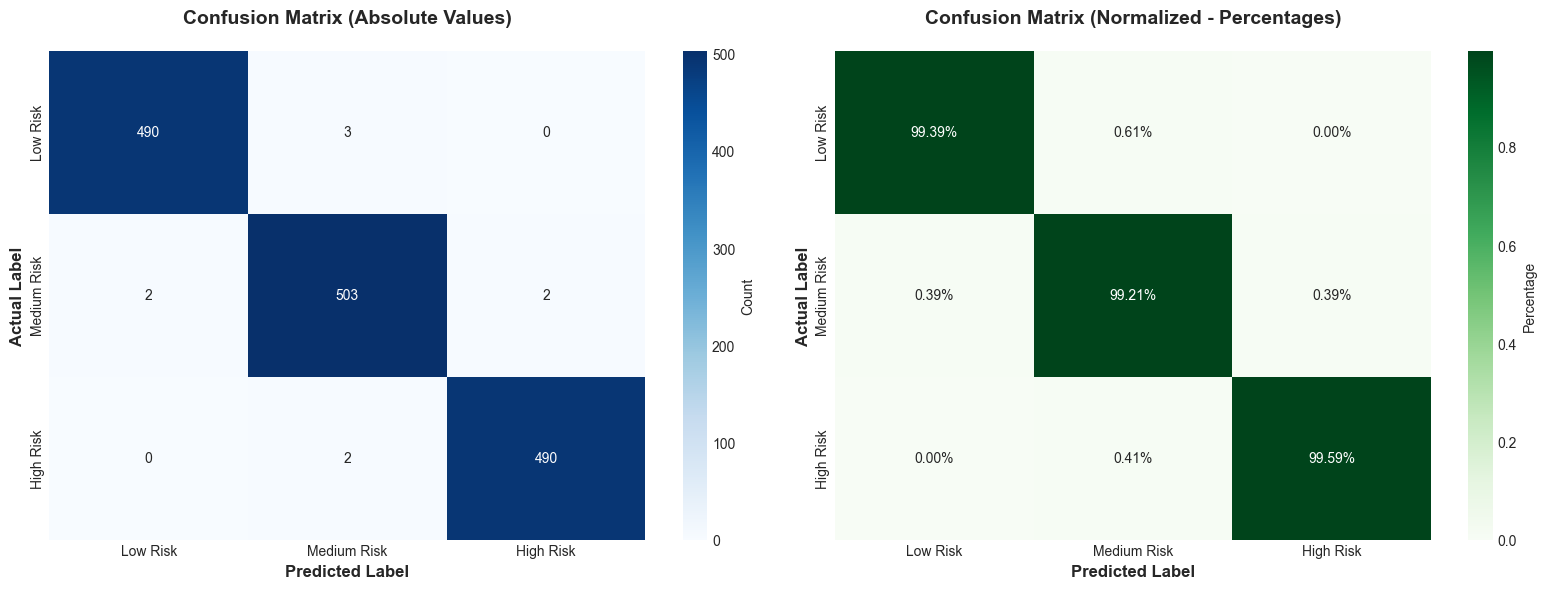


📊 Creating Feature Correlation Heatmap...


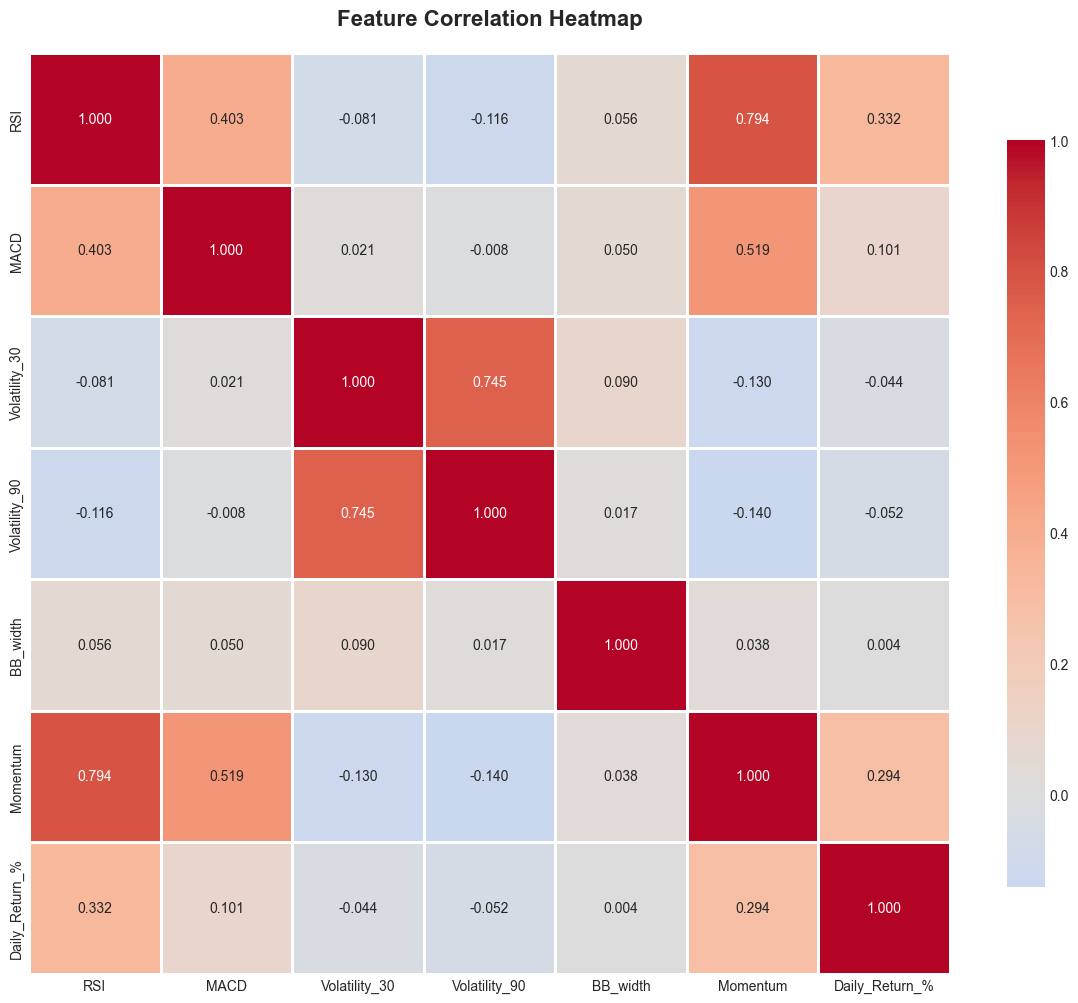


📊 Creating Performance Metrics Table...

PERFORMANCE METRICS TABLE
                 Class Precision Recall F1-Score  Support Class Accuracy
              Low Risk    0.9959 0.9939   0.9949      493         0.9939
           Medium Risk    0.9902 0.9921   0.9911      507         0.9921
             High Risk    0.9959 0.9959   0.9959      492         0.9959
OVERALL (Weighted Avg)    0.9940 0.9940   0.9940     1492         0.9940


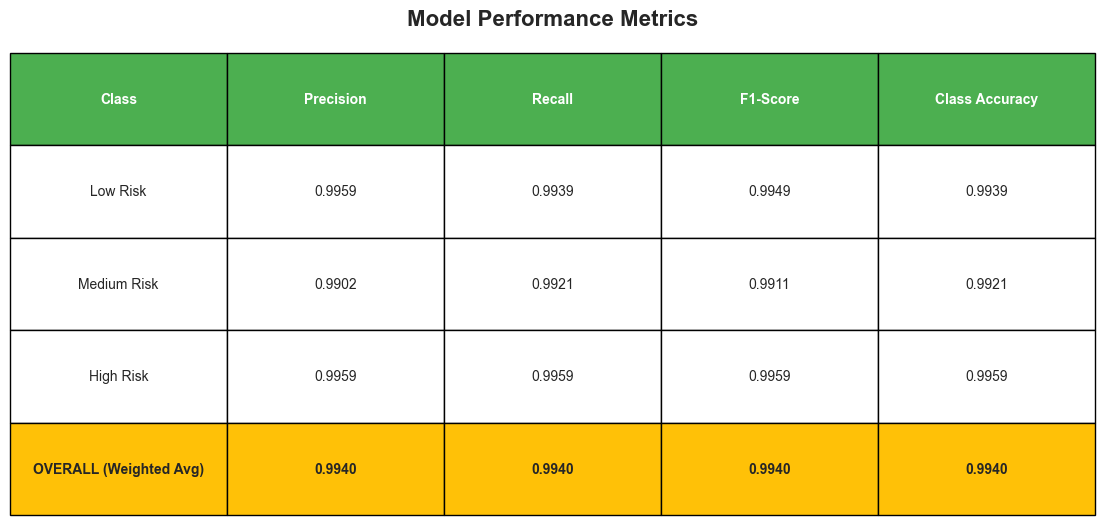


📊 Creating Feature Importance Visualization...


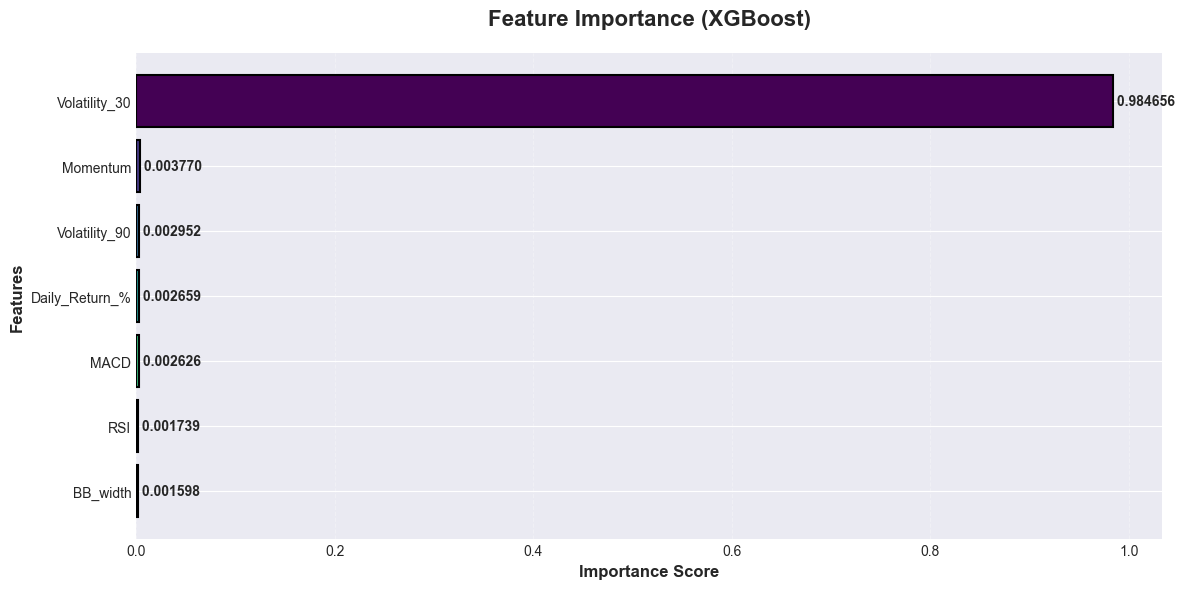

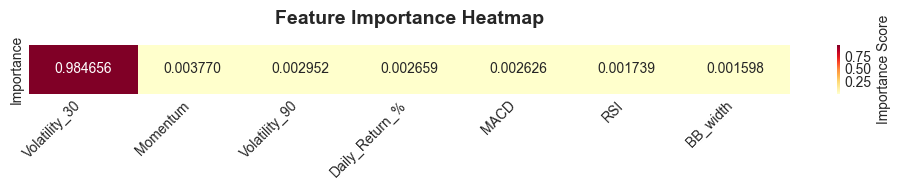


SUMMARY STATISTICS
Total Test Samples: 1492
Overall Accuracy: 0.9940 (99.40%)
Macro Average Precision: 0.9940
Macro Average Recall: 0.9940
Macro Average F1-Score: 0.9940
Weighted Average Precision: 0.9940
Weighted Average Recall: 0.9940
Weighted Average F1-Score: 0.9940

✅ All visualizations generated successfully!


In [25]:
# ============================================================
# PERFORMANCE VISUALIZATIONS
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
import pandas as pd
import numpy as np

# Set style for better-looking plots
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")

print("=" * 60)
print("GENERATING PERFORMANCE VISUALIZATIONS")
print("=" * 60)

# Ensure we have the predictions from the model
if 'y_test' not in locals() or 'y_pred_test' not in locals():
    print("⚠️  Warning: Model predictions not found. Please run the model training cell first.")
else:
    # ============================================================
    # 1. CONFUSION MATRIX HEATMAP
    # ============================================================
    print("\n📊 Creating Confusion Matrix Heatmap...")
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    
    # Create labels
    class_labels = ['Low Risk', 'Medium Risk', 'High Risk']
    
    # Normalize confusion matrix for percentages
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Create figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Absolute values confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_labels, yticklabels=class_labels,
                cbar_kws={'label': 'Count'}, ax=axes[0])
    axes[0].set_title('Confusion Matrix (Absolute Values)', fontsize=14, fontweight='bold', pad=20)
    axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Actual Label', fontsize=12, fontweight='bold')
    
    # Plot 2: Normalized confusion matrix (percentages)
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens',
                xticklabels=class_labels, yticklabels=class_labels,
                cbar_kws={'label': 'Percentage'}, ax=axes[1])
    axes[1].set_title('Confusion Matrix (Normalized - Percentages)', fontsize=14, fontweight='bold', pad=20)
    axes[1].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Actual Label', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # ============================================================
    # 2. FEATURE CORRELATION HEATMAP
    # ============================================================
    print("\n📊 Creating Feature Correlation Heatmap...")
    
    # Calculate correlation matrix
    if 'X_train' in locals():
        correlation_matrix = X_train.corr()
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
                   center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
        plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️  Feature data not available for correlation heatmap.")
    
    # ============================================================
    # 3. PERFORMANCE METRICS TABLE
    # ============================================================
    print("\n📊 Creating Performance Metrics Table...")
    
    # Calculate detailed metrics
    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred_test, labels=[0, 1, 2], zero_division=0
    )
    
    # Calculate accuracy per class
    class_accuracy = []
    for i in range(3):
        class_acc = cm[i, i] / cm[i, :].sum() if cm[i, :].sum() > 0 else 0
        class_accuracy.append(class_acc)
    
    # Create performance table
    performance_data = {
        'Class': ['Low Risk', 'Medium Risk', 'High Risk'],
        'Precision': [f'{p:.4f}' for p in precision],
        'Recall': [f'{r:.4f}' for r in recall],
        'F1-Score': [f'{f:.4f}' for f in f1],
        'Support': support.tolist(),
        'Class Accuracy': [f'{acc:.4f}' for acc in class_accuracy]
    }
    
    performance_df = pd.DataFrame(performance_data)
    
    # Calculate overall metrics
    overall_accuracy = (cm[0, 0] + cm[1, 1] + cm[2, 2]) / cm.sum()
    macro_precision = precision.mean()
    macro_recall = recall.mean()
    macro_f1 = f1.mean()
    weighted_precision = np.average(precision, weights=support)
    weighted_recall = np.average(recall, weights=support)
    weighted_f1 = np.average(f1, weights=support)
    
    # Add overall metrics row
    overall_row = pd.DataFrame({
        'Class': ['OVERALL (Weighted Avg)'],
        'Precision': [f'{weighted_precision:.4f}'],
        'Recall': [f'{weighted_recall:.4f}'],
        'F1-Score': [f'{weighted_f1:.4f}'],
        'Support': [support.sum()],
        'Class Accuracy': [f'{overall_accuracy:.4f}']
    })
    
    performance_df = pd.concat([performance_df, overall_row], ignore_index=True)
    
    # Display as styled table
    print("\n" + "=" * 80)
    print("PERFORMANCE METRICS TABLE")
    print("=" * 80)
    print(performance_df.to_string(index=False))
    print("=" * 80)
    
    # Create visual table
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.axis('tight')
    ax.axis('off')
    
    # Prepare data for table (without 'Support' column for better display)
    table_data = performance_df[['Class', 'Precision', 'Recall', 'F1-Score', 'Class Accuracy']].values
    
    table = ax.table(cellText=table_data,
                    colLabels=['Class', 'Precision', 'Recall', 'F1-Score', 'Class Accuracy'],
                    cellLoc='center',
                    loc='center',
                    bbox=[0, 0, 1, 1])
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    # Style the header
    for i in range(5):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Style the overall row
    for i in range(5):
        table[(4, i)].set_facecolor('#FFC107')
        table[(4, i)].set_text_props(weight='bold')
    
    plt.title('Model Performance Metrics', fontsize=16, fontweight='bold', pad=20)
    plt.show()
    
    # ============================================================
    # 4. FEATURE IMPORTANCE HEATMAP
    # ============================================================
    print("\n📊 Creating Feature Importance Visualization...")
    
    if 'model' in locals() and hasattr(model, 'feature_importances_'):
        # Get feature importance
        feature_importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        # Create bar plot
        plt.figure(figsize=(12, 6))
        colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance_df)))
        bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], 
                       color=colors, edgecolor='black', linewidth=1.5)
        
        # Add value labels on bars
        for i, (idx, row) in enumerate(feature_importance_df.iterrows()):
            plt.text(row['Importance'], i, f' {row["Importance"]:.6f}', 
                    va='center', fontweight='bold', fontsize=10)
        
        plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
        plt.ylabel('Features', fontsize=12, fontweight='bold')
        plt.title('Feature Importance (XGBoost)', fontsize=16, fontweight='bold', pad=20)
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3, linestyle='--')
        plt.tight_layout()
        plt.show()
        
        # Create heatmap-style visualization
        plt.figure(figsize=(10, 2))
        importance_matrix = feature_importance_df['Importance'].values.reshape(1, -1)
        sns.heatmap(importance_matrix, 
                   xticklabels=feature_importance_df['Feature'],
                   yticklabels=['Importance'],
                   annot=True, fmt='.6f', cmap='YlOrRd', 
                   cbar_kws={'label': 'Importance Score'})
        plt.title('Feature Importance Heatmap', fontsize=14, fontweight='bold', pad=15)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # ============================================================
    # 5. ADDITIONAL METRICS SUMMARY
    # ============================================================
    print("\n" + "=" * 80)
    print("SUMMARY STATISTICS")
    print("=" * 80)
    print(f"Total Test Samples: {len(y_test)}")
    print(f"Overall Accuracy: {overall_accuracy:.4f} ({overall_accuracy*100:.2f}%)")
    print(f"Macro Average Precision: {macro_precision:.4f}")
    print(f"Macro Average Recall: {macro_recall:.4f}")
    print(f"Macro Average F1-Score: {macro_f1:.4f}")
    print(f"Weighted Average Precision: {weighted_precision:.4f}")
    print(f"Weighted Average Recall: {weighted_recall:.4f}")
    print(f"Weighted Average F1-Score: {weighted_f1:.4f}")
    print("=" * 80)
    
    print("\n✅ All visualizations generated successfully!")

